# Theoritcal Foundation of Machine Learning Final Project 


1.   Youseef Osama Ahmed 20190629
2.   Mohamed Alameen AbdAlziz 20190720
3.   Osama Khaled Abd-Alghafar
4.   Solhof
5.   Amira



In [1]:
import numpy as np

# Loading the data
Using the keras datasets to load the data, the data is already splitied into train and test sets.
We just going to take a portion of the train to make a validation set

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


# Exploring the Data

(<matplotlib.image.AxesImage at 0x7fe184d92750>, array([9], dtype=uint8))

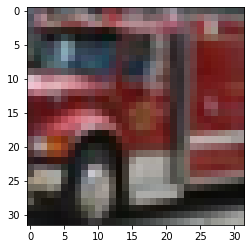

In [3]:
import matplotlib.pyplot as plt
index = 88
plt.imshow(X_train[index]), y_train[index]

some image are too bad even a human being can't recognize it given the following image which is suppose to be for a **Deer**

(<matplotlib.image.AxesImage at 0x7fe184d799d0>, array([4], dtype=uint8))

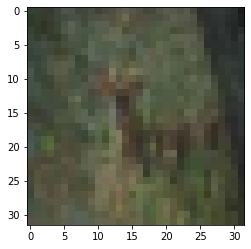

In [4]:
plt.imshow(X_train[10]), y_train[10]

In [5]:
labels = {1:  'airplane',   #back to the documntation
          2:  'bird', 
          3:  'cat', 
          4:  'deer', 
          5:  'dog', 
          6:  'frog', 
          7:  'horse', 
          8:  'ship', 
          9:  'truck'}

In [6]:
unique, counts = np.unique(y_train, return_counts=True) #all the classes equal to each other
dict(zip(unique, counts))

{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

# Data Preprocessing

In [76]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

## Avg Pooling

 looking at the first image at the first pixel (0, 0) coordinates,at each pixel we got three RGB values and we are going to replace them by a single value computed by their avreage.

In [7]:
def avg_pixels(data):
  data_avg = data.copy()
  for i in range(len(data)): #looping over the data
    for x in range(len(data[0])): #looping over the x_coordinates
      for y in range(len(data[0].T[0])): #looping over the y_coordinates
        data_avg[i][x][y] = np.average(data[i][x][y])
  return data_avg

In [ ]:
X_train_avg = avg_pixels(X_train)

In [ ]:
len(X_train_avg) #for debugging

50000

After Averging the images there is no change, they are only converted into gray images like the following examples

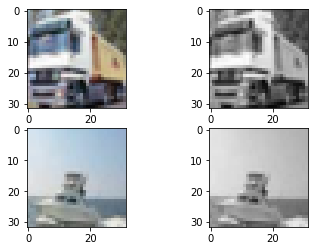

In [ ]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(X_train[1])
axarr[0,1].imshow(X_train_avg[1])
axarr[1,0].imshow(X_train[100])
axarr[1,1].imshow(X_train_avg[100])

Since now all the RGB channels got the same value no need to keep them all, instead we are going to keep only a single chanel, converting each image into a 32x32 matrix, which will provide an efficient way in computation      
ex. the first pixel of the first image will get the values (61, 61, 61) so  we will make it one channel (61)

In [ ]:
X_train_avg[0][0][0]

array([61, 61, 61], dtype=uint8)

In [11]:
def convert(data):
  X_train_avg = avg_pixels(data)
  imgs = []
  for i in range(len(data)):
    img = []
    for j in range(len(data[0])):
      tmp = [int(np.unique(hold)[0]) for hold in X_train_avg[i][j]]
      img.append(tmp)
    imgs.append(img)
  return np.asarray(imgs)

In [13]:
X_train_conv = convert(X_train)

In [14]:
len(X_train_conv)

50000

a sample for converted image into 32 * 32 

In [15]:
max(X_train_conv[0].flatten()) * 29791

7328586

## Applying the momentum 

In [16]:
def c_momentum(data, c = 3):
  m_data = []
  mean_x = (len(data[0][0]) + 1) / 2
  mean_y = (len(data[0][0].T) + 1) / 2
  for img in data:
    ms = []
    for p in range(c+1):
      for q in range(c+1):
        if p + q <= c:
          tmp = np.multiply((np.power(np.arange(len(data[0][0])) - mean_x, p) * np.power(np.arange(len(data[0].T[0] - mean_y)), q)) , img)
          ms.append(tmp.sum().sum())
    m_data.append(ms)
  return np.asarray(m_data)

In [17]:
X_train_m = c_momentum(X_train_conv, c  = 3)

In [18]:
len(X_train_m[0])

10

In [19]:
len(X_train_m)

50000

In [20]:
X_train_m[0]

array([ 1.05589000e+05,  1.63695100e+06,  3.37076310e+07,  7.79918347e+08,
       -1.05267500e+05,  6.69793950e+06,  2.23742436e+08,  8.43485325e+06,
        1.13226434e+08, -2.59486449e+07])

## Spliting the train data into train and validation by 10%

In [21]:
from sklearn.model_selection import train_test_split
X_trainn, X_val, y_trainn, y_val = train_test_split(X_train_m, y_train, test_size=0.1)

In [22]:
len(X_trainn), len(X_val)

(45000, 5000)

# Building the Model


As we can see below many diffrient models with diffrient hyperparamters couldn't catch the complexity of the model even the SVMs with rbf and polynomial kernal. this might be due to many resons


*   Quality of the data, data doesn't have enough information
*   simplicity of the models, even tuning the hyper-parapmeters won't add that much
*   increasing the number of the instances will not add to much, models are too simple 


*   CNN as we see below are a much more complex model enabling them to detect patterns, edges, ..etc, perform much better





## SVM

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [24]:
svc1 = SVC()
svc1.fit(X_trainn, y_trainn.ravel())
svc2 = SVC(kernel='poly', degree=3)
svc2.fit(X_trainn, y_trainn.ravel())
svc3 = SVC(kernel='sigmoid', gamma='auto')
svc3.fit(X_trainn, y_trainn.ravel())

SVC(gamma='auto', kernel='sigmoid')

In [25]:
print(accuracy_score(svc1.predict(X_val), y_val))
print(accuracy_score(svc2.predict(X_val), y_val))
print(accuracy_score(svc2.predict(X_val), y_val))

0.1556

##Random Forest


In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
forest1 = RandomForestClassifier(criterion='entropy', max_depth=50)
forest1.fit(X_trainn, y_trainn.ravel())
forest2 = RandomForestClassifier(criterion='gini', max_depth=70)
forest2.fit(X_trainn, y_trainn.ravel())
forest3 = RandomForestClassifier(criterion='entropy', max_depth=100)
forest3.fit(X_trainn, y_trainn.ravel())

RandomForestClassifier(criterion='entropy', max_depth=100)

In [28]:
print(accuracy_score(forest1.predict(X_val), y_val))
print(accuracy_score(forest2.predict(X_val), y_val))
print(accuracy_score(forest3.predict(X_val), y_val))

0.1748

##Decision Tree


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=100)
tree1.fit(X_trainn, y_trainn.ravel())
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=150)
tree2.fit(X_trainn, y_trainn.ravel())
tree3 = DecisionTreeClassifier(criterion='gini', max_depth=200)
tree3.fit(X_trainn, y_trainn.ravel())

DecisionTreeClassifier(max_depth=200)

In [31]:
print(accuracy_score(tree1.predict(X_val), y_val))
print(accuracy_score(tree2.predict(X_val), y_val))
print(accuracy_score(tree3.predict(X_val), y_val))

0.1376

##KNN


In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn1 = KNeighborsClassifier(n_neighbors=4)
knn1.fit(X_trainn, y_trainn.ravel())
knn2 = KNeighborsClassifier(n_neighbors=6)
knn2.fit(X_trainn, y_trainn.ravel())
knn3 = KNeighborsClassifier(n_neighbors=8)
knn3.fit(X_trainn, y_trainn.ravel())

KNeighborsClassifier(n_neighbors=8)

In [34]:
print(accuracy_score(knn1.predict(X_val), y_val))
print(accuracy_score(knn2.predict(X_val), y_val))
print(accuracy_score(knn3.predict(X_val), y_val))

0.1652

## Trying diffrent momentum value

In [35]:
X_train_m7 = c_momentum(X_train_conv, c = 7)

In [36]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_train_m7, y_train, test_size=0.1)

In [37]:
svc_m7 = SVC()
svc_m7.fit(X_train7, y_train7.ravel())

SVC()

In [38]:
accuracy_score(svc_m7.predict(X_test7), y_test7)

0.1578

In [83]:
X_train_m44 = c_momentum(X_train_conv, c = 44) ##Then number of momentums equal to number of pixels 1035

In [84]:
X_train44, X_val44, y_train44, y_val44 = train_test_split(X_train_m44, y_train, test_size=0.1)

In [ ]:
svc_m44 = SVC()
svc_m44.fit(X_train44, y_train44.ravel())

In [ ]:
accuracy_score(svc_m44.predict(X_val44), y_val44)

## ANN

In [40]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import models, layers

In [41]:
model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(len(X_trainn[0]),)))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [42]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
 dense_3 (Dense)             (None, 10)                40        
                                                                 
Total params: 134
Trainable params: 134
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(X_trainn, y_trainn, epochs=10, 
                    validation_data=(X_val, y_val))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1407/1407 [==============================] - 3s 2ms/step - loss: 5215217.0000 - accuracy: 0.1019 - val_loss: 5868.6294 - val_accuracy: 0.1024
Epoch 2/10
1407/1407 [==============================] - 2s 2ms/step - loss: 4927.4595 - accuracy: 0.1032 - val_loss: 1772.6780 - val_accuracy: 0.1012
Epoch 3/10
1407/1407 [==============================] - 2s 2ms/step - loss: 2216.5771 - accuracy: 0.0991 - val_loss: 778.4107 - val_accuracy: 0.0996
Epoch 4/10
1407/1407 [==============================] - 2s 2ms/step - loss: 1231.3141 - accuracy: 0.0980 - val_loss: 308.3908 - val_accuracy: 0.1040
Epoch 5/10
1407/1407 [==============================] - 2s 2ms/step - loss: 606.0553 - accuracy: 0.0982 - val_loss: 58.8144 - val_accuracy: 0.1030
Epoch 6/10
1407/1407 [==============================] - 3s 2ms/step - loss: 288.7906 - accuracy: 0.0997 - val_loss: 2.6507 - val_accuracy: 0.0990
Epoch 7/10
1407/1407 [==============================] - 2s 2ms/step - loss: 135.6311 - accuracy: 0.0957 - val_loss: 2

CNN on the normal data

In [45]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [46]:
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10))

In [47]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [48]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model2.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.7223 - accuracy: 0.3915 - val_loss: 1.4216 - val_accuracy: 0.4790
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.3551 - accuracy: 0.5167 - val_loss: 1.2591 - val_accuracy: 0.5544
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1903 - accuracy: 0.5806 - val_loss: 1.1506 - val_accuracy: 0.5896
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0853 - accuracy: 0.6196 - val_loss: 1.1459 - val_accuracy: 0.6013
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9954 - accuracy: 0.6533 - val_loss: 1.1063 - val_accuracy: 0.6172
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9319 - accuracy: 0.6756 - val_loss: 1.0578 - val_accuracy: 0.6475
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8707 - accuracy: 0.6979 - val_loss: 1.0442 -

313/313 - 4s - loss: 1.1040 - accuracy: 0.6574 - 4s/epoch - 12ms/step


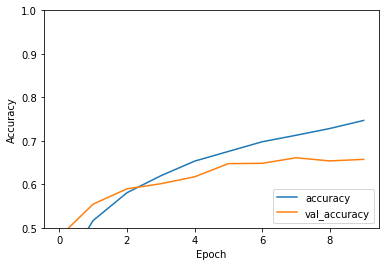

In [49]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(X_test,  y_test, verbose=2)


# Error Analysis

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [77]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

-----------------Convolutional Neural Network Report---------------
F1 score: 0.6579962374811126
Accuracy score: 0.6574
Confusion matrix: 
 [[678  18  54  28  10  13   5  33 134  27]
 [ 31 790   5  18   5   3   7  17  36  88]
 [ 80   3 590  68  62  83  27  64  15   8]
 [ 36   9  79 409  52 258  19  87  32  19]
 [ 32   5  94  69 561  74  13 127  21   4]
 [ 17   2  69 138  21 649   3  71  19  11]
 [  7   3  93 163  56  39 589  27  13  10]
 [ 11   3  37  40  33  91   0 762   7  16]
 [ 66  34  11  11   7  11   5  12 813  30]
 [ 37  79  12  13  17  12   7  37  53 733]]
Plotting confusion matrix


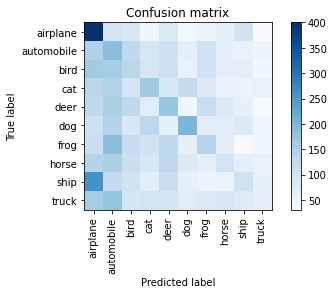

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1000
           1       0.84      0.79      0.81      1000
           2       0.57      0.59      0.58      1000
           3       0.43      0.41      0.42      1000
           4       0.68      0.56      0.62      1000
           5       0.53      0.65      0.58      1000
           6       0.87      0.59      0.70      1000
           7       0.62      0.76      0.68      1000
           8       0.71      0.81      0.76      1000
           9       0.77      0.73      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [82]:
cnn_pred = model2.predict(X_test)
cnn_pred = np.argmax(cnn_pred,axis=1)

cnn_f1 = metrics.f1_score(y_test, cnn_pred, average= "weighted")
cnn_accuracy= metrics.accuracy_score(y_test, cnn_pred)
cnn_cm = metrics.confusion_matrix(y_test, cnn_pred)
print("-----------------Convolutional Neural Network Report---------------")
print("F1 score: {}".format(cnn_f1))
print("Accuracy score: {}".format(cnn_accuracy))
print("Confusion matrix: \n", cnn_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, cnn_pred))

In [52]:
X_test_transformed = convert(X_test)
X_test_m = c_momentum(X_test_transformed, c  = 3)
y_test = y_test.ravel()

-----------------SVM Report---------------
F1 score: 0.15602505642802258
Accuracy score: 0.185
Confusion matrix: 
 [[397   0   0   1 103   7  68 133 243  48]
 [141   0   0   7 184  32 243 205 108  80]
 [168   0   0  12 177  29 195 186 128 105]
 [143   2   0  38 138  96 228 161 104  90]
 [ 64   0   0   9 238  20 259 234 119  57]
 [110   1   0  18 154 168 164 141 172  72]
 [ 98   0   0  10 218  29 336 170  71  68]
 [119   0   0  11 186  44 134 248 151 107]
 [218   0   0   4 142  45  70 178 285  58]
 [159   0   0   7 160  31  88 228 187 140]]
Plotting confusion matrix


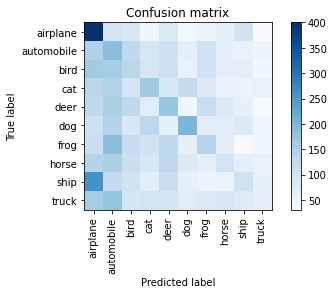

              precision    recall  f1-score   support

           0       0.25      0.40      0.30      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.32      0.04      0.07      1000
           4       0.14      0.24      0.18      1000
           5       0.34      0.17      0.22      1000
           6       0.19      0.34      0.24      1000
           7       0.13      0.25      0.17      1000
           8       0.18      0.28      0.22      1000
           9       0.17      0.14      0.15      1000

    accuracy                           0.18     10000
   macro avg       0.17      0.18      0.16     10000
weighted avg       0.17      0.18      0.16     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
# SVM report and analysis
y_pred_svc = svc1.predict(X_test_m)
svc_f1 = metrics.f1_score(y_test, y_pred_svc, average= "weighted")
svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
svc_cm = metrics.confusion_matrix(y_test, y_pred_svc)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_f1))
print("Accuracy score: {}".format(svc_accuracy))
print("Confusion matrix: \n", svc_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc))

-----------------RandomForest Report---------------
F1 score: 0.1734389336537169
Accuracy score: 0.1754
Confusion matrix: 
 [[329  78  81  53  82  38  69  71 149  50]
 [107 129 103  78 114  71 134  85  70 109]
 [117  94  95  86 133  83 125  83  96  88]
 [ 78  92  77 155  91 153  90  63  89 112]
 [ 84  99  99  58 175  67 163  94  91  70]
 [ 70  83  63 148  55 249  90  71  81  90]
 [ 55 125 102  86 139  71 181  83  54 104]
 [ 86 103  82 100 125  83  81 134  89 117]
 [186  73  81  77  92  85  72  83 158  93]
 [ 96 120  82  99  72  82  93 110  97 149]]
Plotting confusion matrix


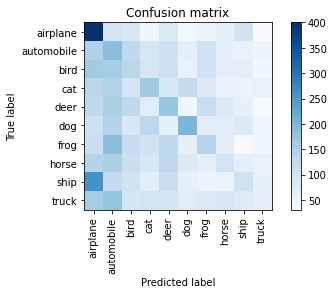

              precision    recall  f1-score   support

           0       0.27      0.33      0.30      1000
           1       0.13      0.13      0.13      1000
           2       0.11      0.10      0.10      1000
           3       0.16      0.15      0.16      1000
           4       0.16      0.17      0.17      1000
           5       0.25      0.25      0.25      1000
           6       0.16      0.18      0.17      1000
           7       0.15      0.13      0.14      1000
           8       0.16      0.16      0.16      1000
           9       0.15      0.15      0.15      1000

    accuracy                           0.18     10000
   macro avg       0.17      0.18      0.17     10000
weighted avg       0.17      0.18      0.17     10000



In [80]:
# RandomForest report and analysis
y_pred_forest = forest1.predict(X_test_m)
forest_f1 = metrics.f1_score(y_test, y_pred_forest, average= "weighted")
forest_accuracy = metrics.accuracy_score(y_test, y_pred_forest)
forest_cm = metrics.confusion_matrix(y_test, y_pred_forest)
print("-----------------RandomForest Report---------------")
print("F1 score: {}".format(forest_f1))
print("Accuracy score: {}".format(forest_accuracy))
print("Confusion matrix: \n", forest_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_forest))

-----------------KNN Report---------------
F1 score: 0.16019695625797453
Accuracy score: 0.1673
Confusion matrix: 
 [[400  99  87  45  83  42  50  60 103  31]
 [148 188 128  91 106  64 104  64  57  50]
 [165 162 137  91 109  57 101  66  67  45]
 [136 145  92 166  89 124  78  58  55  57]
 [128 154 130  73 175  45 117  81  62  35]
 [106 144  86 133  60 200  73  70  81  47]
 [114 187 120 101 131  60 140  69  33  45]
 [141 151 111  90 133  80  68 100  68  58]
 [259 124 102  70 113  65  50  53 104  60]
 [160 179  92  98  92  73  78  88  77  63]]
Plotting confusion matrix


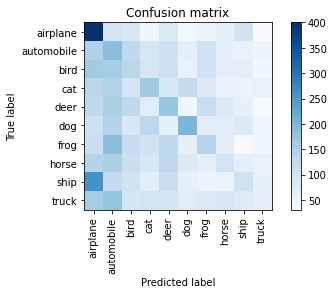

              precision    recall  f1-score   support

           0       0.23      0.40      0.29      1000
           1       0.12      0.19      0.15      1000
           2       0.13      0.14      0.13      1000
           3       0.17      0.17      0.17      1000
           4       0.16      0.17      0.17      1000
           5       0.25      0.20      0.22      1000
           6       0.16      0.14      0.15      1000
           7       0.14      0.10      0.12      1000
           8       0.15      0.10      0.12      1000
           9       0.13      0.06      0.08      1000

    accuracy                           0.17     10000
   macro avg       0.16      0.17      0.16     10000
weighted avg       0.16      0.17      0.16     10000



In [78]:
# KNN report and analysis
y_pred_knn = knn3.predict(X_test_m)
knn_f1 = metrics.f1_score(y_test, y_pred_knn, average= "weighted")
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
print("-----------------KNN Report---------------")
print("F1 score: {}".format(knn_f1))
print("Accuracy score: {}".format(knn_accuracy))
print("Confusion matrix: \n", knn_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_knn))

-----------------DecisionTree Report---------------
F1 score: 0.13799806248136035
Accuracy score: 0.138
Confusion matrix: 
 [[201 103  90  53 101  58  66  84 158  86]
 [ 87 123 108  75 123  82 109 107  83 103]
 [ 81  96  99  91 121  89 118  91  93 121]
 [ 77 103  98 129  74 121 109  89  93 107]
 [ 78 144  93  84 142  78 108 101  97  75]
 [ 78  93  94 119  70 180  91  81 100  94]
 [ 65 125 116  81 110  98 134  93  90  88]
 [ 90  93 105 101 104 104  94 108  98 103]
 [148  87  78  85  91  95  85  96 128 107]
 [ 95 115  80  87  84  90  89 126  98 136]]
Plotting confusion matrix


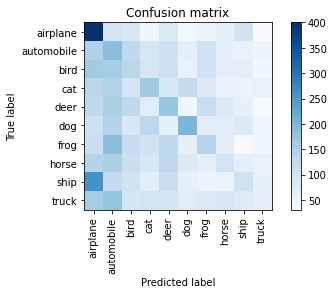

              precision    recall  f1-score   support

           0       0.20      0.20      0.20      1000
           1       0.11      0.12      0.12      1000
           2       0.10      0.10      0.10      1000
           3       0.14      0.13      0.14      1000
           4       0.14      0.14      0.14      1000
           5       0.18      0.18      0.18      1000
           6       0.13      0.13      0.13      1000
           7       0.11      0.11      0.11      1000
           8       0.12      0.13      0.13      1000
           9       0.13      0.14      0.13      1000

    accuracy                           0.14     10000
   macro avg       0.14      0.14      0.14     10000
weighted avg       0.14      0.14      0.14     10000



In [79]:
# DecisionTree report and analysis
y_pred_tree = tree3.predict(X_test_m)
tree_f1 = metrics.f1_score(y_test, y_pred_tree, average= "weighted")
tree_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
tree_cm = metrics.confusion_matrix(y_test, y_pred_tree)
print("-----------------DecisionTree Report---------------")
print("F1 score: {}".format(tree_f1))
print("Accuracy score: {}".format(tree_accuracy))
print("Confusion matrix: \n", tree_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_tree))